In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import nbodykit

In [46]:
painted_central_hod = np.load("central_hod.npy")
painted_sat_hod = np.load("sat_hod.npy")
painted_central_tf = np.load("central_tf.npy")
painted_sat_tf = np.load("sat_tf.npy")*1.03 #normalization? Idk... 

In [47]:
painted_central_hod[0].shape,painted_central_tf[0].shape

((128, 128, 128), (128, 128, 128))

(0, 1.1)

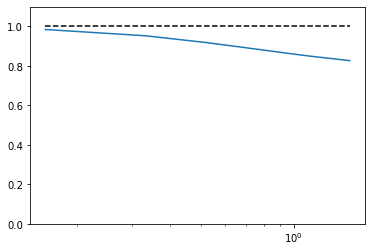

In [48]:
from nbodykit.lab import *
pm_central_hod = nbodykit.source.mesh.array.ArrayMesh(painted_central_hod[0], 250)
pm_central_tf = nbodykit.source.mesh.array.ArrayMesh(painted_central_tf[0], 250)


pk_central_hod = FFTPower(pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
pk_central_tf = FFTPower(pm_central_tf,mode='1d', dk=0.2, kmin=0.01).power


pk_x = FFTPower(pm_central_tf,second = pm_central_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.semilogx(pk['k'], pk_x['power'].real/np.sqrt(pk_central_hod['power'].real*pk_central_tf['power'].real))
plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
plt.ylim([0,1.1])

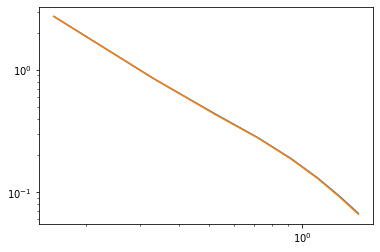

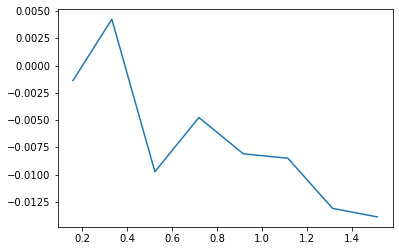

In [49]:
plt.loglog(pk['k'], pk_central_hod['power'].real)
plt.loglog(pk['k'], pk_central_tf['power'].real)
show()

plt.plot(pk['k'], (pk_central_tf['power'].real-pk_central_hod['power'].real)/pk_central_hod['power'].real)


In [50]:
pm_sat_hod = nbodykit.source.mesh.array.ArrayMesh(painted_sat_hod[0], 250)
pm_sat_tf = nbodykit.source.mesh.array.ArrayMesh(painted_sat_tf[0], 250)


pk_sat_hod = FFTPower(pm_sat_hod, mode='1d', dk=0.2, kmin=0.01).power
pk_sat_tf = FFTPower(pm_sat_tf,mode='1d', dk=0.2, kmin=0.01).power


(0, 1.1)

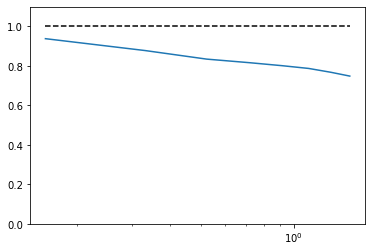

In [51]:

pk_x = FFTPower(pm_sat_tf,second = pm_sat_hod, mode='1d', dk=0.2, kmin=0.01).power
plt.semilogx(pk['k'], pk_x['power'].real/np.sqrt(pk_sat_hod['power'].real*pk_sat_tf['power'].real))
plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
plt.ylim([0,1.1])

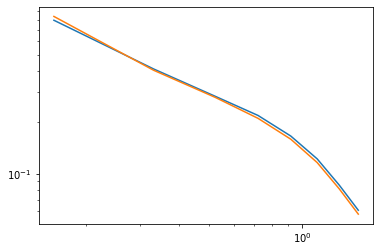

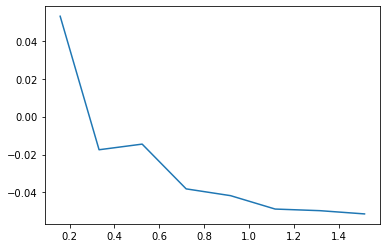

In [52]:
plt.loglog(pk['k'], pk_sat_hod['power'].real)
plt.loglog(pk['k'], pk_sat_tf['power'].real)
show()

plt.plot(pk['k'], (pk_sat_tf['power'].real-pk_sat_hod['power'].real)/pk_sat_hod['power'].real)


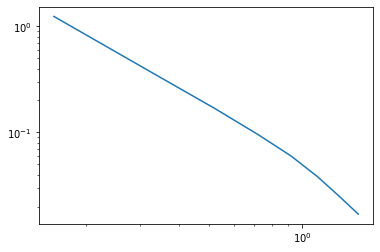

In [55]:
#galaxy-sattilite cross correlation
pk_x_tf = FFTPower(pm_sat_tf,second = pm_central_tf, mode='1d', dk=0.2, kmin=0.01).power
plt.loglog(pk['k'], pk_x['power'].real)

pk_x_hod = FFTPower(pm_sat_tf,second = pm_central_tf, mode='1d', dk=0.2, kmin=0.01).power
plt.loglog(pk['k'], pk_x['power'].real)
#plt.plot([pk['k'][0],pk['k'][-1]],[1,1],"--",color="black")
#plt.ylim([0,1.1])